## A. Importing Modules & Datasets

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Read CSV File to pandas dataframe
df = pd.read_csv('../reports/company_report_2.csv')

## B. Data Exploration

In [3]:
# first 5 rows of the dataframe
df.head(5)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
0,21963,2,Enterprise,2017-01-01,1,1,2017,Sun,1,Winter,3.881135,0,12,0,0.90,3,234,0,400000.0
1,38224,2,Enterprise,2017-01-02,2,1,2017,Mon,0,Winter,3.871357,5,13,55,0.70,3,2071,0,400000.0
2,39066,2,Enterprise,2017-01-03,3,1,2017,Tues,0,Winter,3.853797,22,43,58,12.81,3,2090,10,400000.0
3,39399,2,Enterprise,2017-01-04,4,1,2017,Wed,0,Winter,3.852843,7,56,65,28.08,3,2104,40,400000.0
4,38744,2,Enterprise,2017-01-05,5,1,2017,Thurs,0,Winter,3.854277,23,50,73,45.30,3,2070,0,400000.0


In [4]:
# last 5 rows of the dataframe
df.tail(5)

,volume_tests,company_id,company_type,time,date,month,year,day,is_weekend,season,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
1204,27635,2,Enterprise,2020-04-19,19,4,2020,Sun,1,Spring,3.742250,7,81,0,2041.52,6,1350,38,400000.0
1205,42871,2,Enterprise,2020-04-20,20,4,2020,Mon,0,Spring,3.728250,28,321,0,2130.91,6,4192,199,400000.0
1206,43677,2,Enterprise,2020-04-21,21,4,2020,Tues,0,Spring,3.731583,50,459,0,2273.58,6,4191,122,400000.0
1207,43808,2,Enterprise,2020-04-22,22,4,2020,Wed,0,Spring,3.728667,22,1246,0,2467.16,6,4197,171,400000.0
1208,44703,2,Enterprise,2020-04-23,23,4,2020,Thurs,0,Spring,3.717125,21,653,0,2316.74,6,4202,135,400000.0


In [5]:
# statistical summary for all numerical attributes
df.describe()

,volume_tests,company_id,date,month,year,is_weekend,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_hrs,number_test_types,numbers_tested,followup_tests,min_commit
count,1209.000000,1209.0,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.0
mean,35514.281224,2.0,15.646816,6.137304,2018.188586,0.285360,3.796914,21.200993,322.167907,74.941274,6540.463805,3.042184,2215.531017,115.009926,400000.0
std,11013.525639,0.0,8.776954,3.512891,0.972725,0.451773,0.127135,42.870436,345.310889,195.218011,3131.695025,0.858753,1183.469271,152.620759,0.0
min,7679.000000,2.0,1.000000,1.000000,2017.000000,0.000000,3.582000,0.000000,0.000000,0.000000,0.700000,2.000000,215.000000,0.000000,400000.0
25%,25668.000000,2.0,8.000000,3.000000,2017.000000,0.000000,3.700625,3.000000,85.000000,0.000000,4463.950000,2.000000,799.000000,23.000000,400000.0
50%,37049.000000,2.0,16.000000,6.000000,2018.000000,0.000000,3.780208,10.000000,216.000000,7.000000,7473.620000,3.000000,2430.000000,66.000000,400000.0
75%,44829.000000,2.0,23.000000,9.000000,2019.000000,1.000000,3.811583,27.000000,454.000000,57.000000,9189.470000,4.000000,3024.000000,153.000000,400000.0
max,57033.000000,2.0,31.000000,12.000000,2020.000000,1.000000,4.126346,943.000000,4456.000000,1838.000000,10627.660000,6.000000,4267.000000,2337.000000,400000.0


In [6]:
# count frequency for is_weekend
df['is_weekend'].value_counts()

0    864
1    345
Name: is_weekend, dtype: int64

In [7]:
# total count for is_weekend
df['is_weekend'].count()

1209

## C. Distribution Analysis

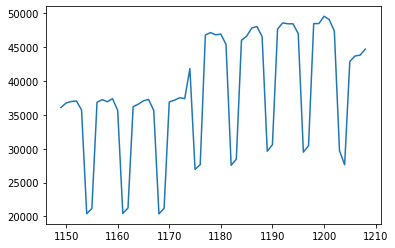

In [8]:
plt.plot(df['volume_tests'][-60:])
plt.show()

Text(0, 0.5, 'Number of tests')

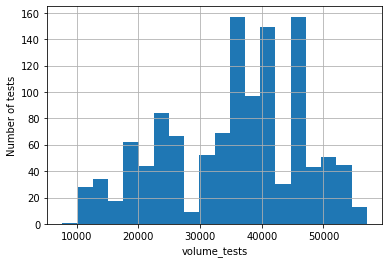

In [9]:
# histogram of volume_tests
df['volume_tests'].hist(bins=20)
plt.xlabel('volume_tests')
plt.ylabel('Number of tests')

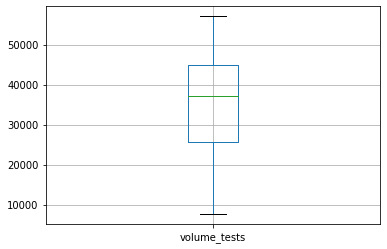

In [10]:
# boxplot of volume_tests
df.boxplot(column='volume_tests')

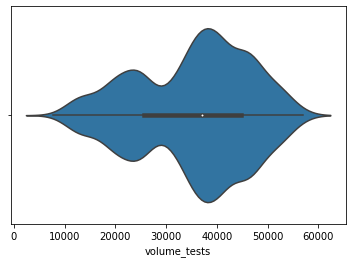

In [11]:
#Violinplot for volume_tests
sns.violinplot(x=df['volume_tests'])

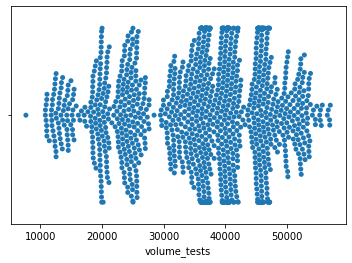

In [12]:
#Swarmplot for volume_tests
sns.swarmplot(x=df['volume_tests'])

Text(0, 0.5, 'Frequency')

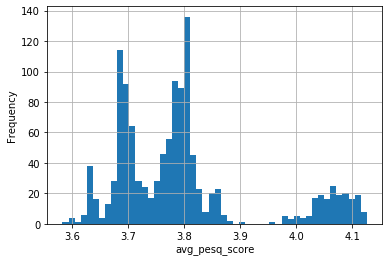

In [13]:
# histogram of avg_pesq_score
df['avg_pesq_score'].hist(bins=50)
plt.xlabel('avg_pesq_score')
plt.ylabel('Frequency')

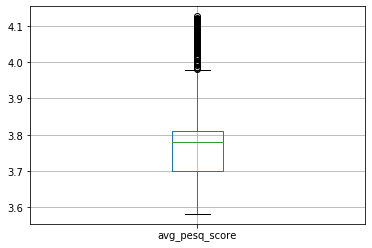

In [14]:
# boxplot of avg_pesq_score
df.boxplot(column='avg_pesq_score')

Text(0, 0.5, 'Frequency')

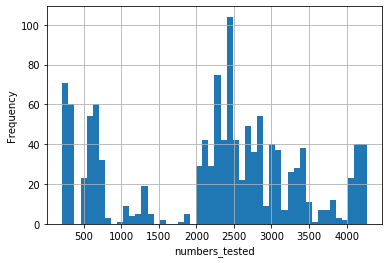

In [15]:
# histogram of numbers_tested
df['numbers_tested'].hist(bins=50)
plt.xlabel('numbers_tested')
plt.ylabel('Frequency')

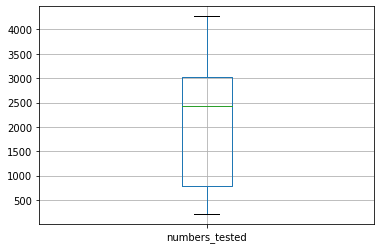

In [16]:
# boxplot of numbers_tested
df.boxplot(column='numbers_tested')

Text(0, 0.5, 'Frequency')

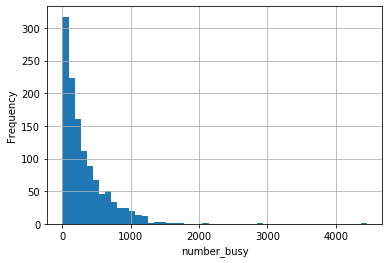

In [17]:
# histogram of number_busy
df['number_busy'].hist(bins=50)
plt.xlabel('number_busy')
plt.ylabel('Frequency')

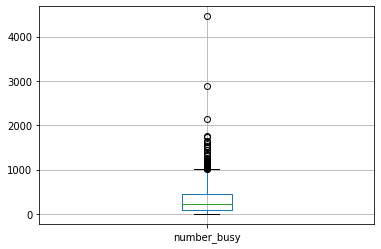

In [18]:
# boxplot of number_busy
df.boxplot(column='number_busy')

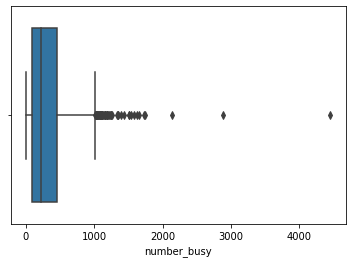

In [19]:
# seaborn-style boxpolot for number_busy
sns.boxplot(x=df['number_busy'])

Text(0.5, 0.98, '')

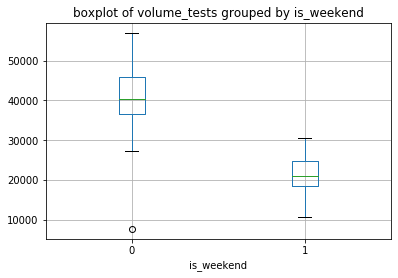

In [20]:
# boxplots of volume_tests, grouped by the categorical attribute is_weekend
df.boxplot(column='volume_tests', by='is_weekend')
plt.title('boxplot of volume_tests grouped by is_weekend')
plt.suptitle("")

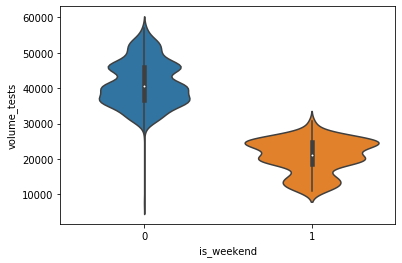

In [21]:
# violinplot of volume_tests. grouped by the categorical attribute is_weekend
sns.violinplot(x='is_weekend', y='volume_tests', data=df)

Text(0.5, 0.98, '')

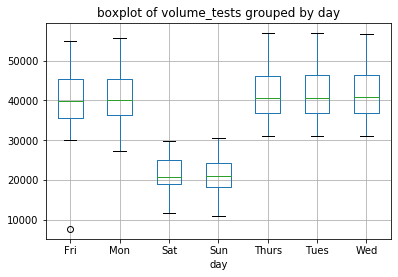

In [22]:
# boxplots of volume_tests, grouped by the categorical attribute day
df.boxplot(column='volume_tests', by='day')
plt.title('boxplot of volume_tests grouped by day')
plt.suptitle("")

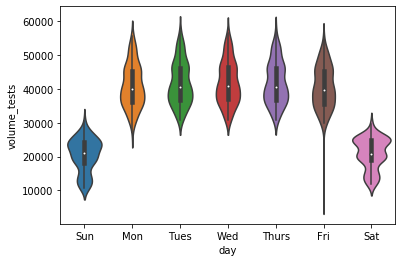

In [23]:
# violin plot of volume_tests. grouped by the categorical attribute is_weekend
sns.violinplot(x='day', y='volume_tests', data=df)

Text(0.5, 0.98, '')

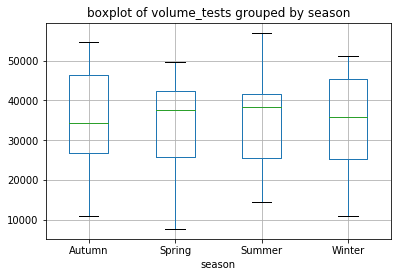

In [24]:
# boxplots of volume_tests, grouped by the categorical attribute season
df.boxplot(column='volume_tests', by='season')
plt.title('boxplot of volume_tests grouped by season')
plt.suptitle("")

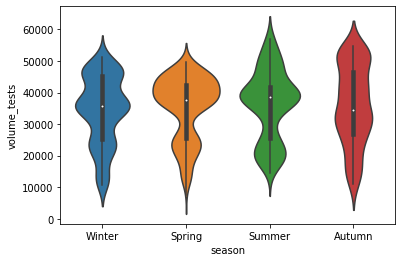

In [25]:
# violin plot of volume_tests. grouped by the categorical attribute season
sns.violinplot(x='season', y='volume_tests', data=df)

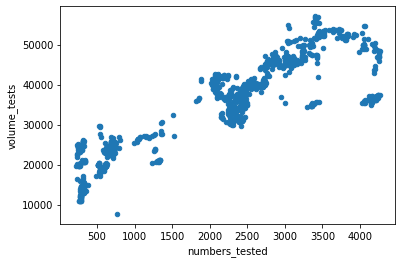

In [26]:
# Showing the relationship between numbers_tested and volume_tests
# As you can see, volume_tests tends to grow linearly when numbers_tested increases
df.plot.scatter(x='numbers_tested', y='volume_tests')

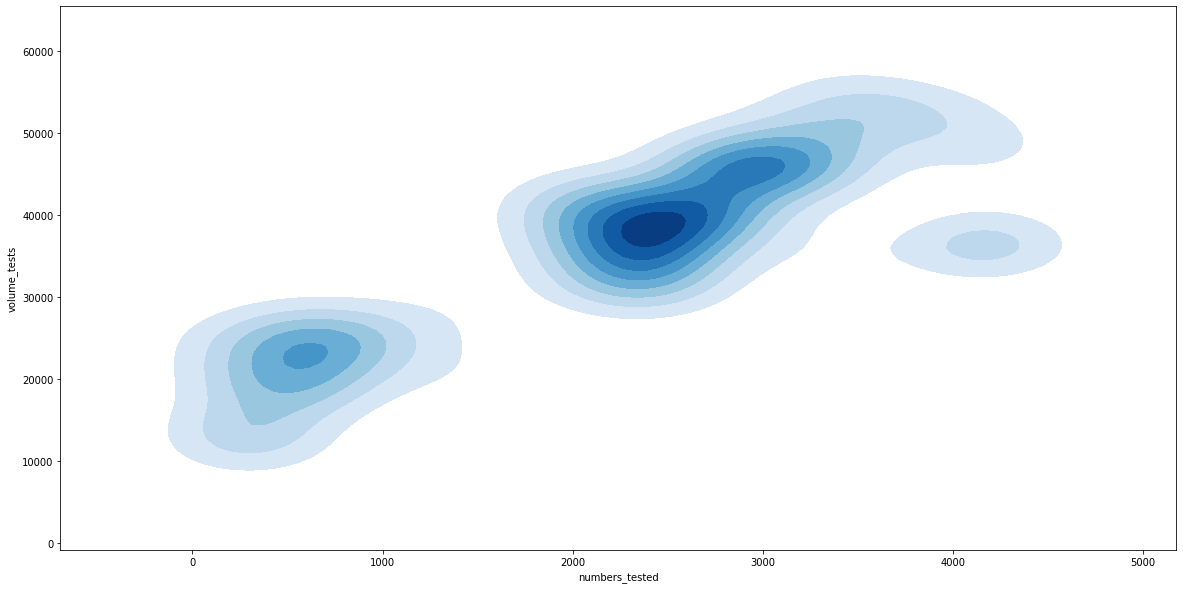

In [27]:
# kernel density estimate plot between numbers_tested and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['numbers_tested'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

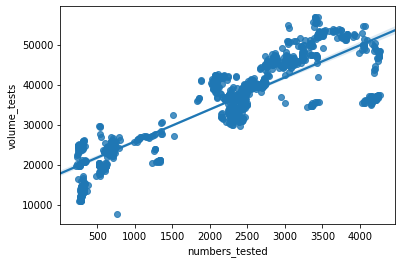

In [28]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='numbers_tested', y='volume_tests', data=df)

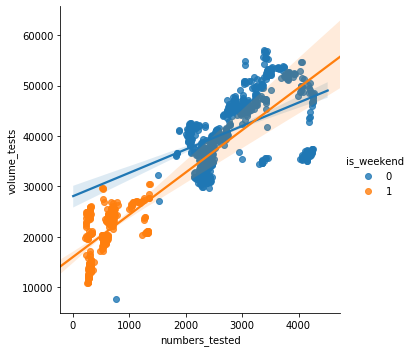

In [29]:
# regression models across conditional subsets of a dataset for a subset is_weekend
sns.lmplot(x="numbers_tested", y="volume_tests", hue="is_weekend", data=df);

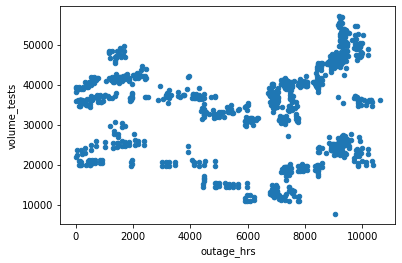

In [30]:
# Showing the relationship between outage_hrs and volume_tests
df.plot.scatter(x='outage_hrs', y='volume_tests')

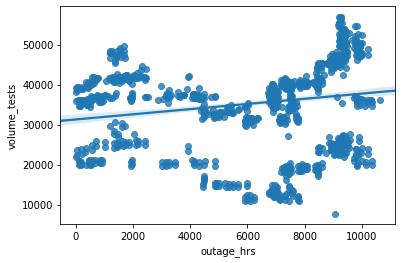

In [31]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='outage_hrs', y='volume_tests', data=df)

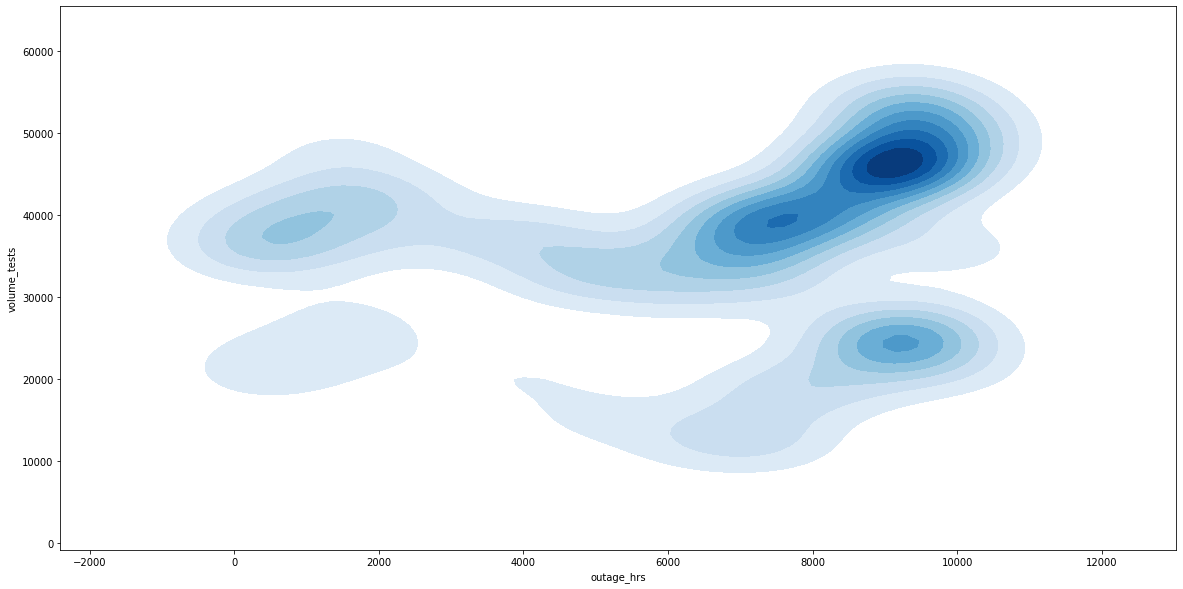

In [32]:
# kernel density estimate plot between outage_hrs and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['outage_hrs'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

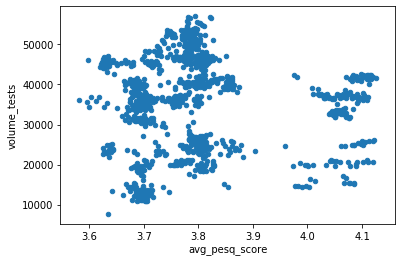

In [33]:
# Showing the relationship between avg_pesq_score and volume_tests
df.plot.scatter(x='avg_pesq_score', y='volume_tests')

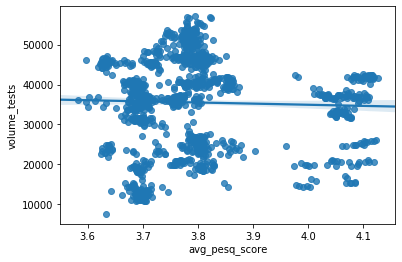

In [34]:
# linear regression plot between numbers_tested and volume_tests
sns.regplot(x='avg_pesq_score', y='volume_tests', data=df)

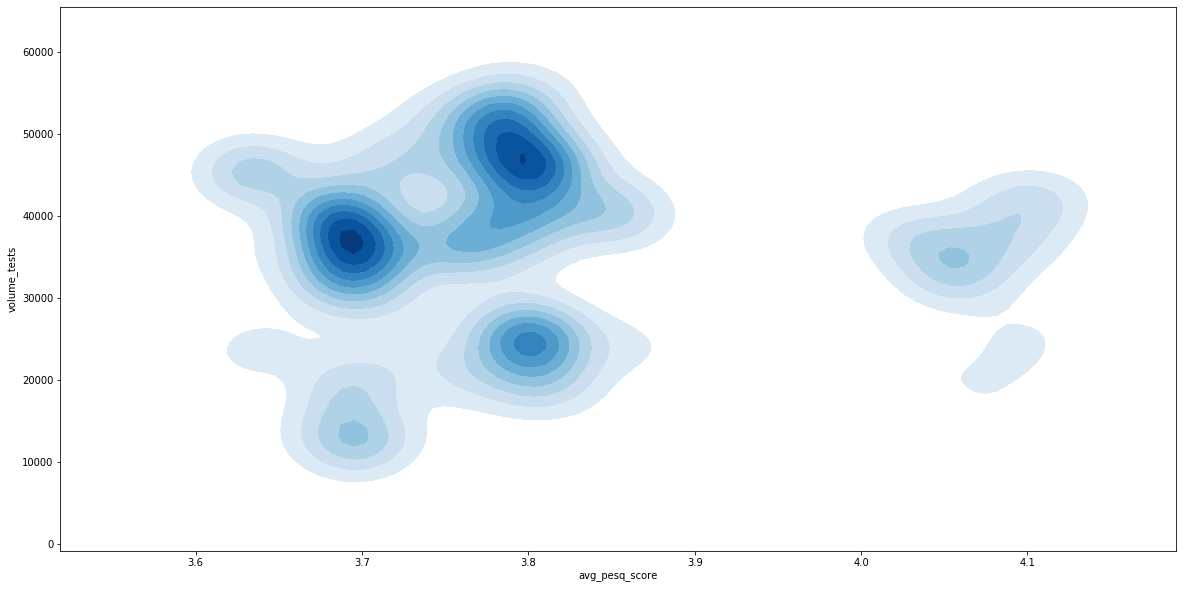

In [35]:
# kernel density estimate plot between outage_hrs and volume_tests
plt.figure(figsize=(20,10))
sns.kdeplot(df['avg_pesq_score'], df['volume_tests'],cmap="Blues", shade=True, shade_lowest=False)

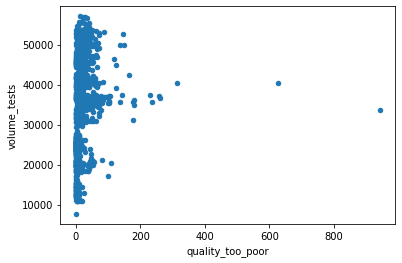

In [36]:
# Showing the relationship between avg_pesq_score and volume_tests
df.plot.scatter(x='quality_too_poor', y='volume_tests')

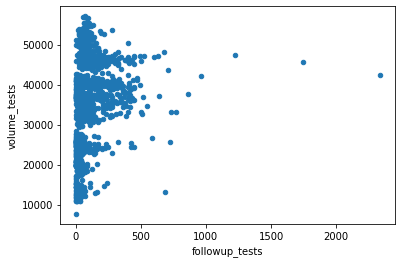

In [37]:
# Showing the relationship between followup_tests and volume_tests
df.plot.scatter(x='followup_tests', y='volume_tests')

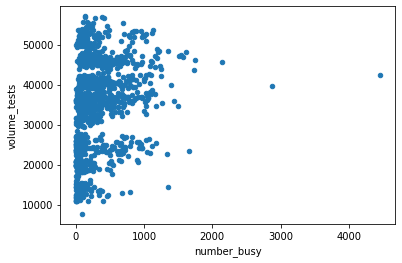

In [38]:
# Showing the relationship between number_busy and volume_tests
df.plot.scatter(x='number_busy', y='volume_tests')

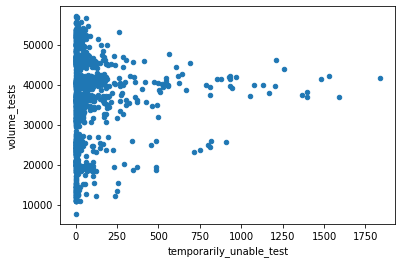

In [39]:
# Showing the relationship between temporarily_unable_test and volume_tests
df.plot.scatter(x='temporarily_unable_test', y='volume_tests')

## D. Heatmaps, Catplots, Pairplots

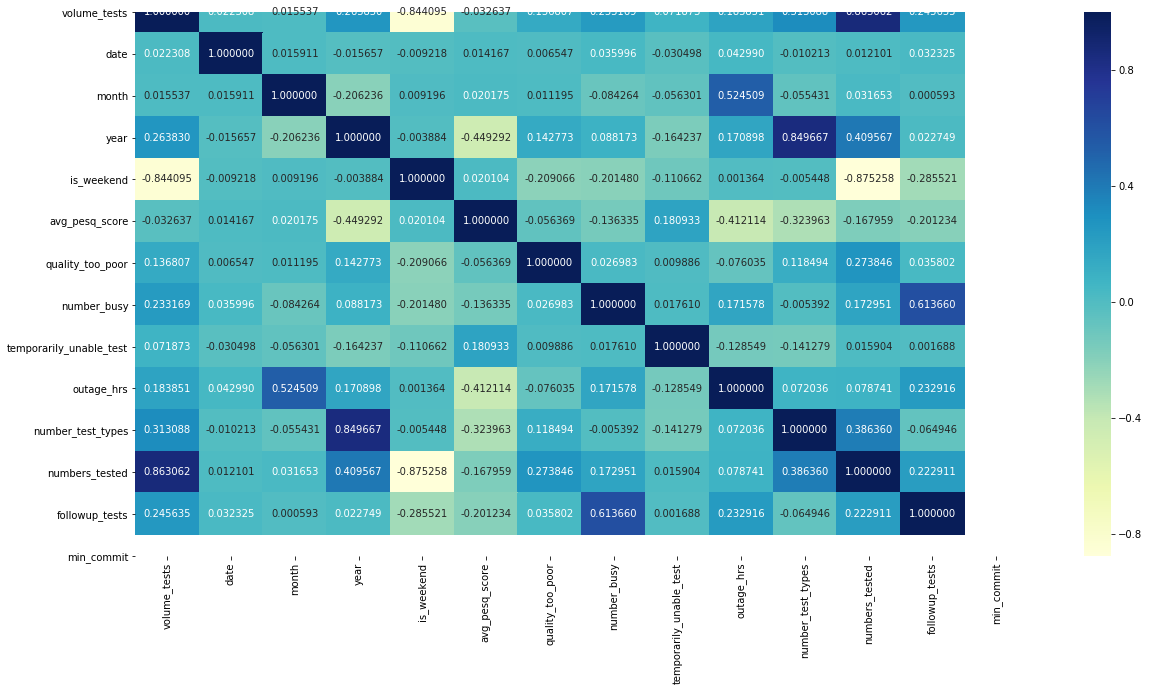

In [48]:
# color-encoded matrix
plt.figure(figsize=(20,10))
df = df[['volume_tests', 'date', 'month', 'year', 'is_weekend', 'avg_pesq_score', 'quality_too_poor', 'number_busy', 'temporarily_unable_test', 'outage_hrs', 'number_test_types', 'numbers_tested', 'followup_tests', 'min_commit']]
df_corr= df.corr()
sns.heatmap(df_corr, annot=True, fmt="f", cmap="YlGnBu")

<Figure size 1440x720 with 0 Axes>

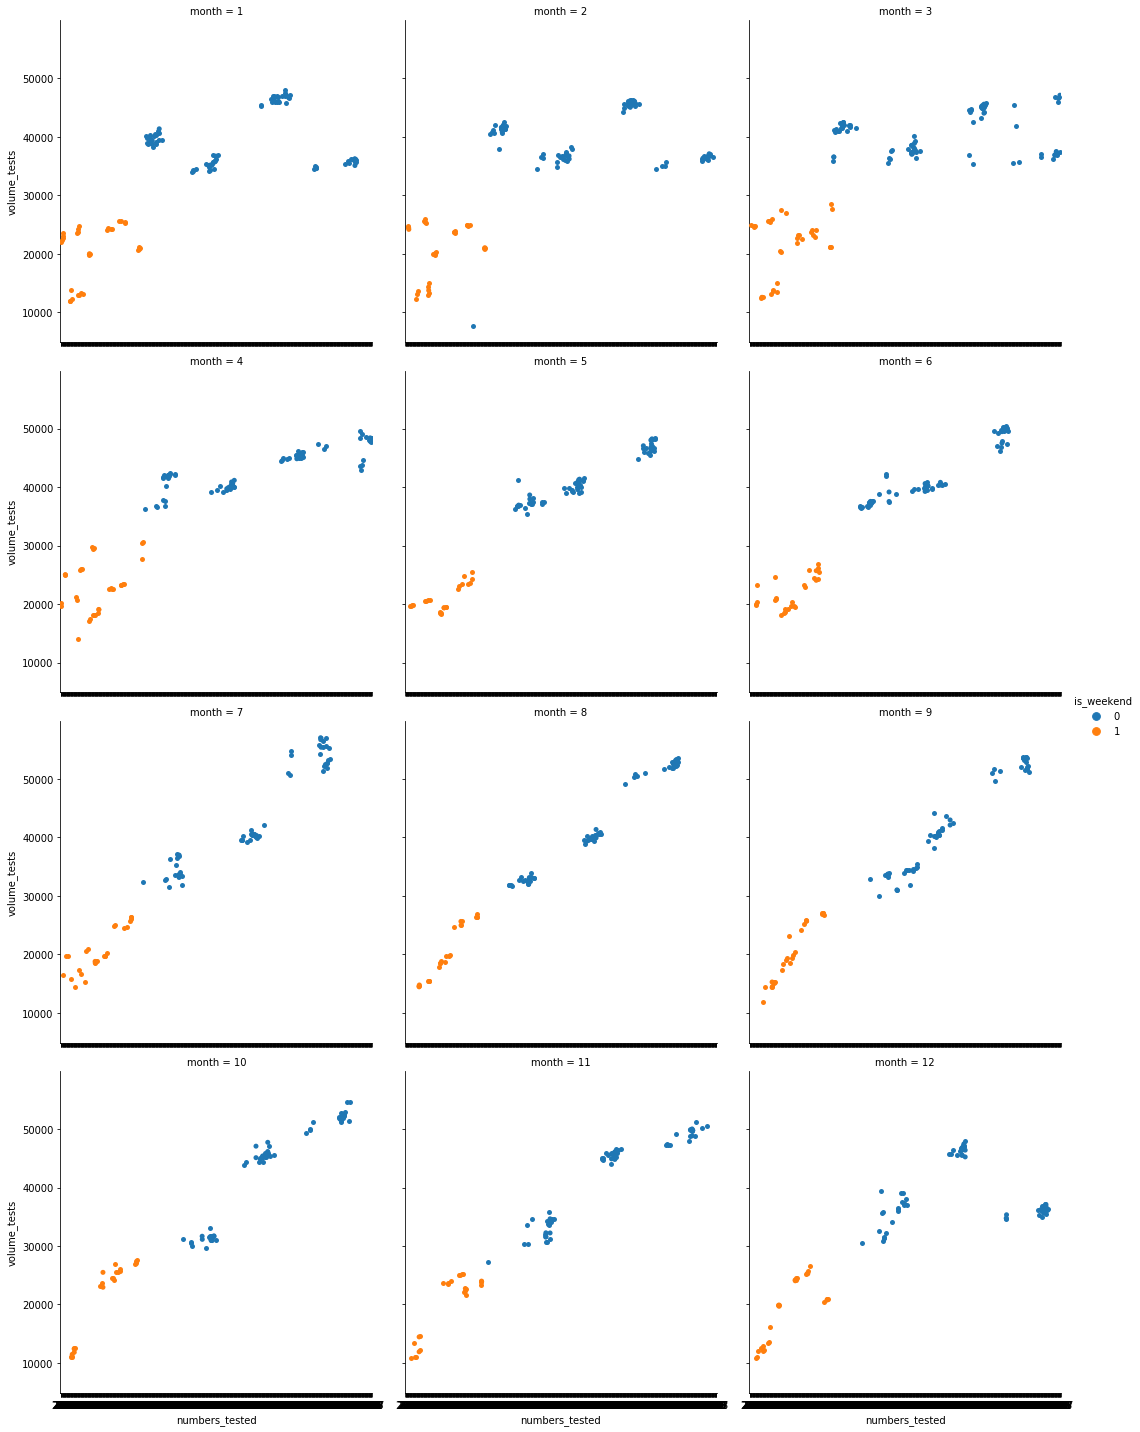

In [41]:
# catplot to show the relationship between a numerical and categorical variables
plt.figure(figsize=(20,10))
sns.catplot(x="numbers_tested", y="volume_tests", hue="is_weekend", col_wrap=3, 
            col="month",
            kind="swarm", data=df);

/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/shanebowen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

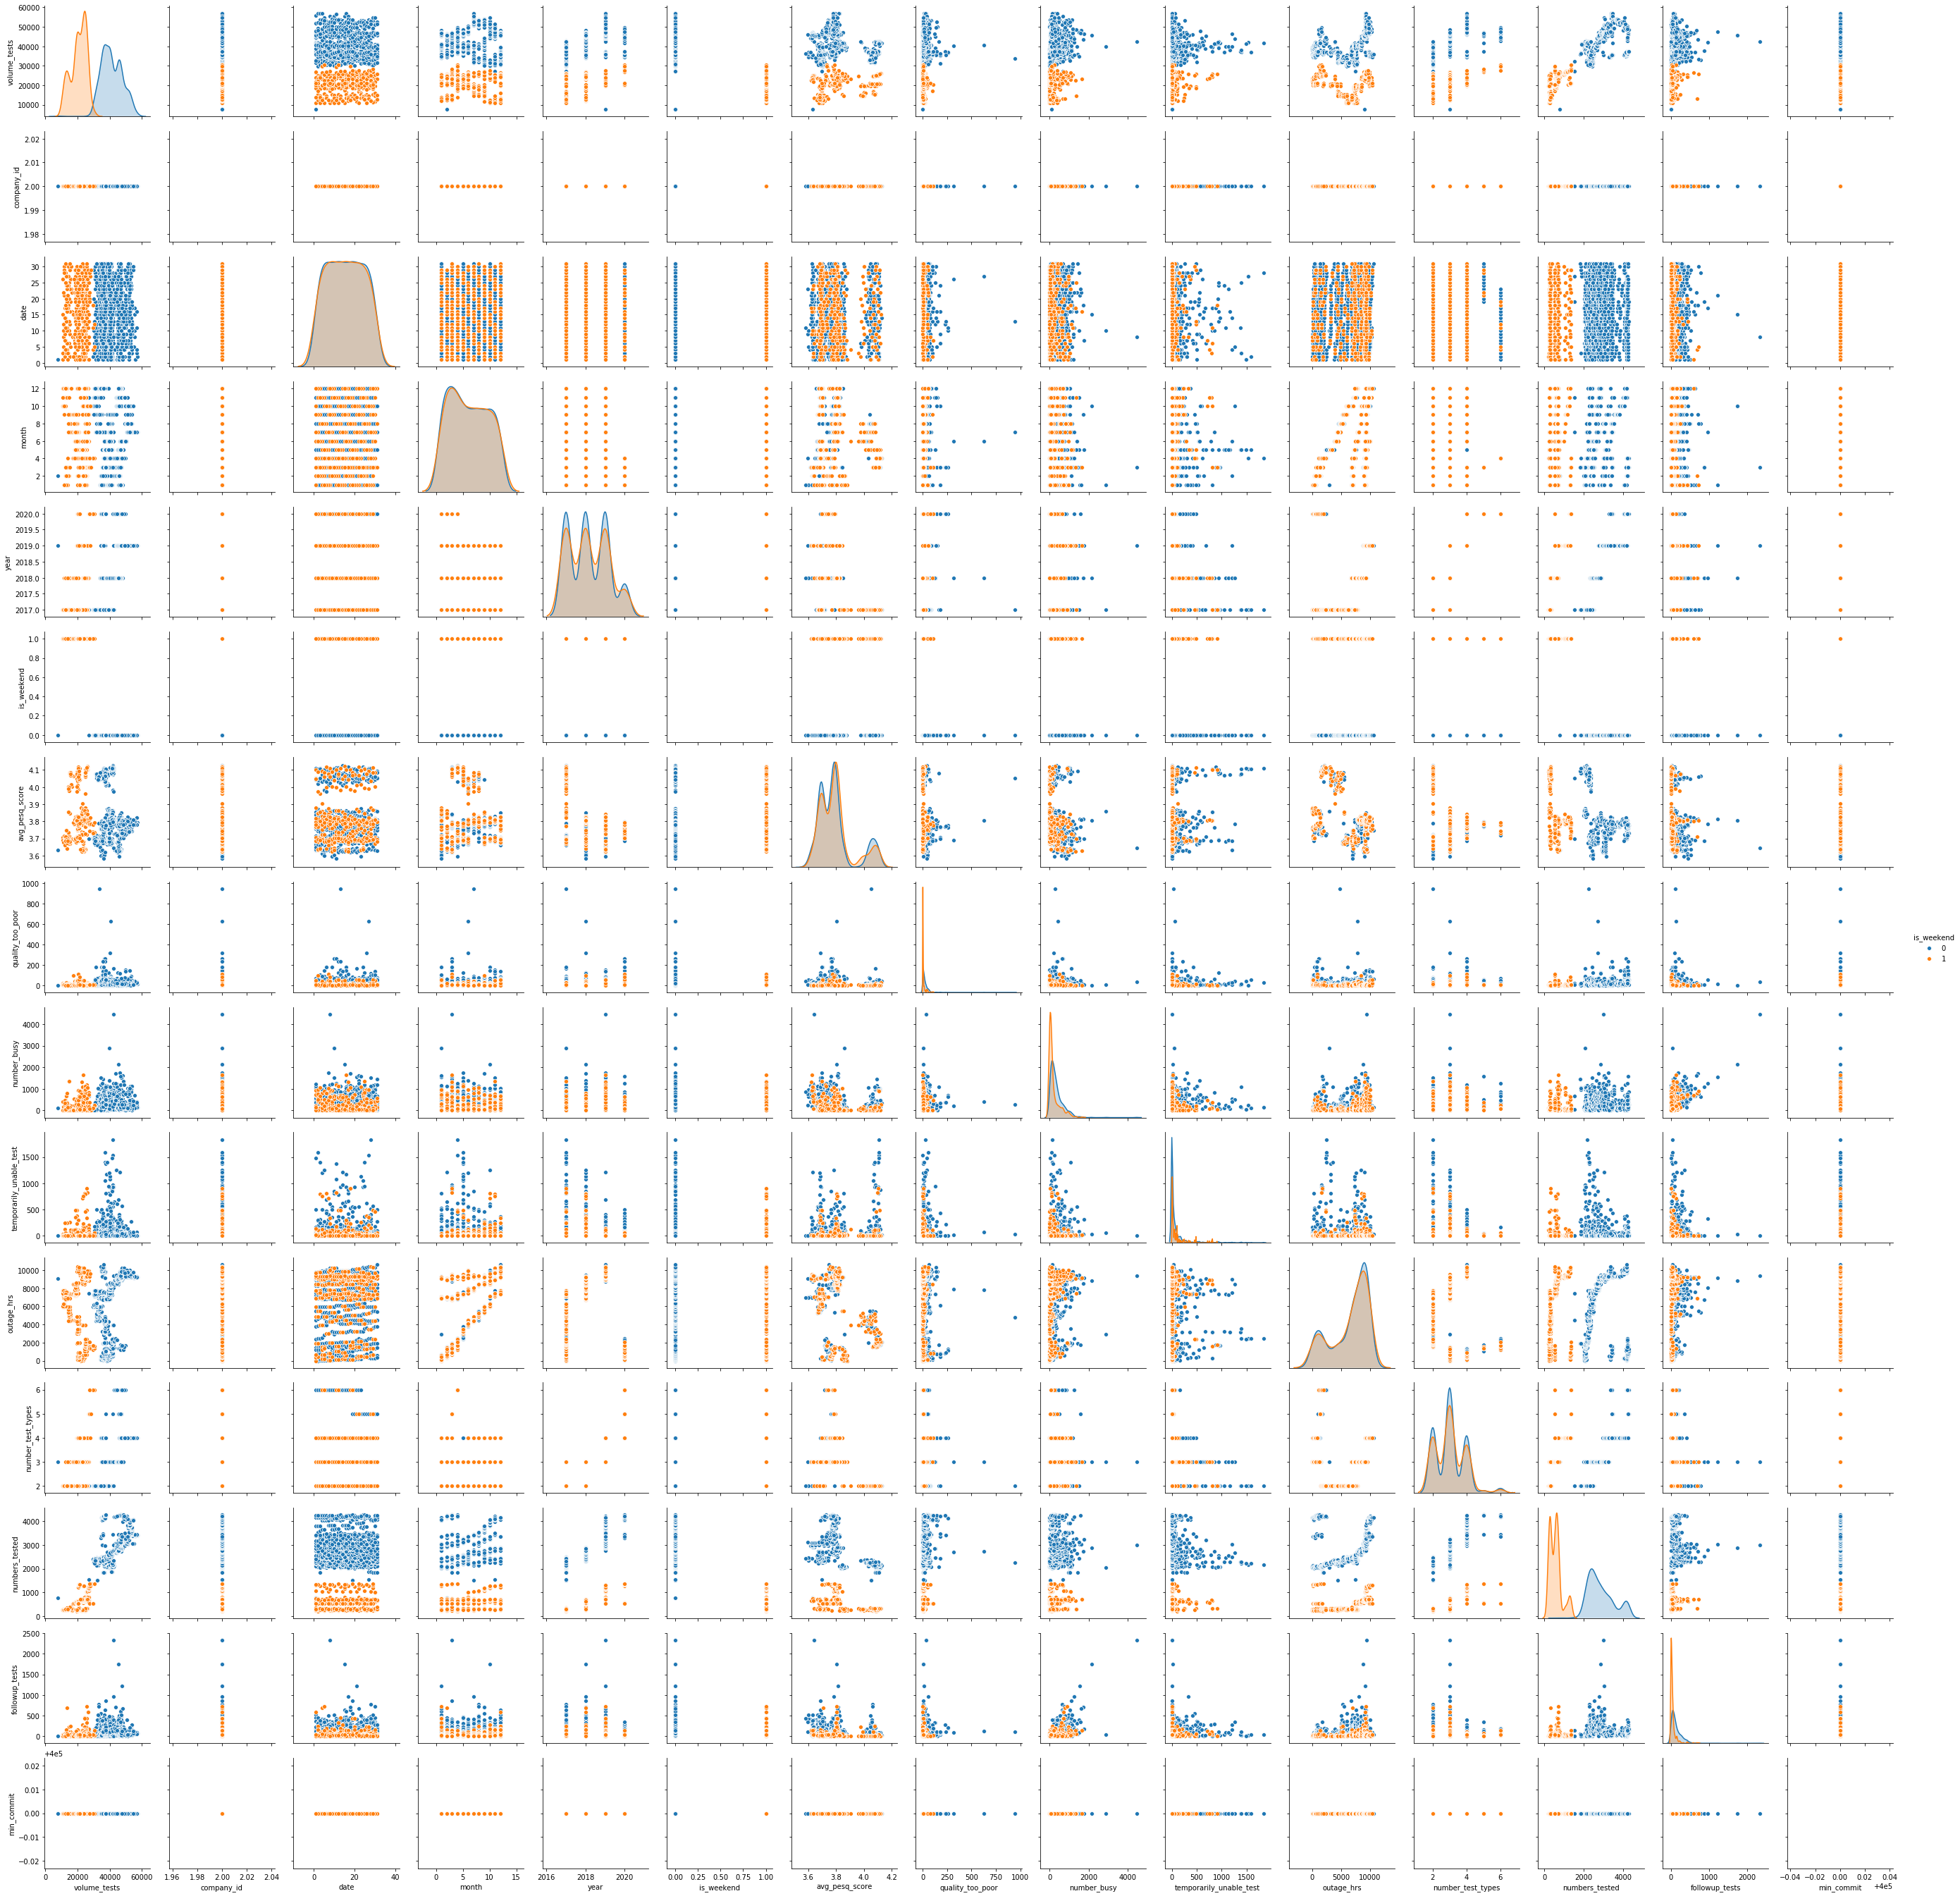

<Figure size 1440x1440 with 0 Axes>

In [42]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df,hue="is_weekend");
plt.figure(figsize=(20,20))

## F. Univariate Selection, Feature Importance

In [44]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# read csv int pandas dataframe
data = pd.read_csv("../reports/company_report_2.csv")
X = data[['date', 'month', 'year', 'is_weekend', 'avg_pesq_score', 'number_busy', 'temporarily_unable_test', 
         'outage_hrs', 'number_test_types', 'numbers_tested', 'followup_tests']]  #independent columns
y = data['volume_tests']    #target column i.e price range

In [45]:
# Univariate Selection
# Strongest relationship with output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) #concat two dataframes for better visualization
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs         Score
7                outage_hrs  1.775103e+06
9            numbers_tested  7.599260e+05
6   temporarily_unable_test  6.108596e+05
5               number_busy  4.360387e+05
10           followup_tests  2.408953e+05
0                      date  5.798061e+03
1                     month  2.390008e+03
3                is_weekend  8.640000e+02
8         number_test_types  2.897092e+02
4            avg_pesq_score  5.035573e+00


[0.1345758  0.06801003 0.00992817 0.00425791 0.13558471 0.1332087
 0.11424467 0.13110353 0.01251058 0.13488772 0.12168818]


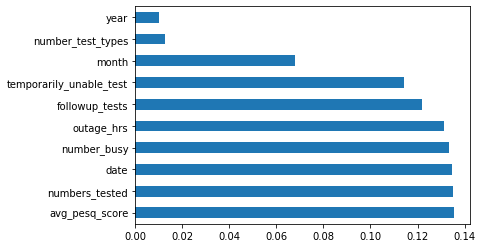

In [46]:
# Feature Importance
# Most important or relevant feature towards output variable
# plot graph of feature importances for better visualization

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()